<a href="https://colab.research.google.com/github/rahmanole/MDTrAnal/blob/master/notebook/KCUSUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/internship works/MDTrAnal/lib')

from codar.oas.MDTrSampler import MDTrSampler, svd_wrapper
!pip install parmed
import parmed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 27.2 MB/s 
  Created wheel for parmed: filename=ParmEd-3.4.3-cp37-cp37m-linux_x86_64.whl size=807322 sha256=4908952caad1a1084a4f048b3f2baf32af421004299c0458c56168e62739c6bf
  Stored in directory: /root/.cache/pip/wheels/2f/26/b3/8cb8da47601e3057598009e903ba5d71e3a8ff08bcbc65cd1e
Successfully built parmed


In [99]:
def gk(x,y):
  return np.exp(-((x-y)**2/2.0))


def mmd(x_n_1, x_n, y_n_1, y_n,delta=0):

    xx = gk(x_n_1, x_n)
    yy = gk(y_n_1, y_n)
    xy = gk(x_n_1, y_n)
    yx = gk(x_n, y_n_1)
  
    return xx + yy - xy - yx - delta

In [65]:
sample_x_1 = np.random.normal(0,1,size=1000)
sample_x_2 = np.random.normal(0,2,size=1000)
sample_x = np.concatenate((sample_x_1, sample_x_2))

# sample_x = np.random.normal(0,1,size=2000)
# sample_x[700] = 9
# sample_x[1000] = 10
# sample_x[1300] = 8

sample_y = np.random.normal(0,1,size=2000)
sample_z = np.random.normal(0,2,size=2000)
sample_w = np.random.normal(0,1,size=2000)


sample_x_CUSUM = np.cumsum(sample_x)
sample_y_CUSUM = np.cumsum(sample_y)

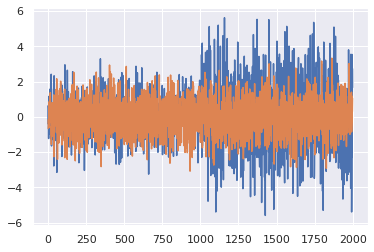

In [31]:
plt.plot(np.arange(0,2000),sample_x)
plt.plot(np.arange(0,2000),sample_y)

In [100]:
def KCUSUM(sample_x,sample_y,h=0,delta=0):
    Z_n = 0
    n = len(sample_x)
    T_kcusum = 0
 

    for i in range(1,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
        else:
            v_n = 0

        Z_n += v_n
        if Z_n < 0:
            Z_n = 0

        if Z_n > h: 
            T_kcusum = i
            break

    return T_kcusum 

In [101]:
def plot_time_vs_v(sample_x,sample_y,h,delta=0):
    Z_n = 0
    h >= 0
    n = len(sample_x)
    T_kcusum = []
 

    for i in range(1,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
            #print(v_n)
            T_kcusum.append((i,v_n))

    cp = np.array(T_kcusum)
    print(np.mean(cp[:,1]))
    plt.plot(cp[:,0],cp[:,1])


In [106]:
KCUSUM(sample_x,sample_y,10,0.05)

1356

0.044300321240528545


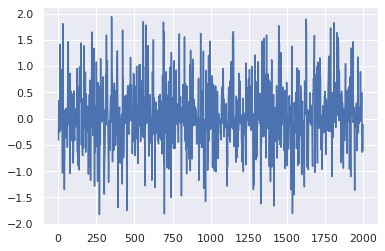

In [102]:
plot_time_vs_v(sample_z,sample_y,10,0.05)

In [103]:
def plot_time_vs_z(sample_x,sample_y,h,delta=0):
    Z_n = 0
    h >= 0
    n = len(sample_x)
    T_kcusum = []
    #values_Z_n = []
 

    for i in range(1,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
            #print(v_n)
        else:
            v_n = 0

        Z_n += v_n
        #print('value of z_n',Z_n)
        if Z_n < 0:
            Z_n = 0

        #if Z_n > h: 
        T_kcusum.append((i,Z_n))

            #break
    cp = np.array(T_kcusum)
    print(np.mean(cp[:,1]))
    plt.plot(cp[:,0],cp[:,1])


9.719053298276878


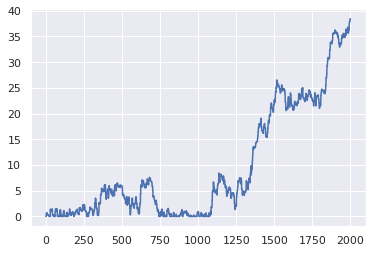

In [104]:
plot_time_vs_z(sample_x,sample_y,0,0.05)

15.216086068254784


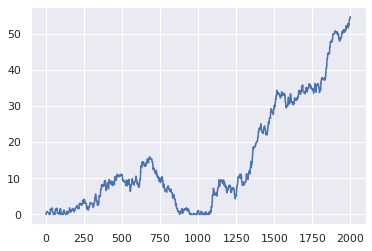

In [105]:
plot_time_vs_z(sample_x,sample_y,0,0.015)

5.400376290066082


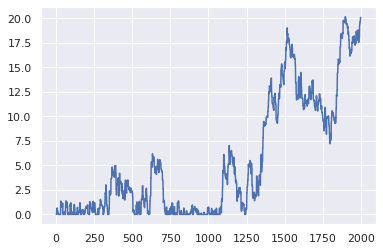

In [86]:
plot_time_vs_z(sample_x,sample_y,0,0.095)

### Testing with real data

In [10]:
d = parmed.amber.AmberMdcrd('/content/drive/MyDrive/Colab Notebooks/internship works/7cz4_375/7cz4_md.crd', natom=2649, hasbox=True, mode='r')

In [11]:
(x,y,z) = d.coordinates.shape
t2 = d.coordinates.reshape((x, y*z),order='C')

In [12]:
Ut, St, VTt = svd_wrapper(t2, 2, method='random')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


In [13]:
c = Ut
s = St

In [14]:
n_dim=2
step=100
c

array([[ 0.01811637,  0.03285736],
       [ 0.01816794,  0.03307382],
       [ 0.01820939,  0.03307899],
       ...,
       [ 0.01758527, -0.0138704 ],
       [ 0.01758772, -0.01393853],
       [ 0.01758772, -0.01393853]])

In [24]:
x = c[:,0]
y = c[:,1]

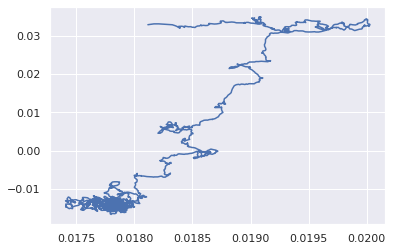

In [27]:
plt.plot(x,y)

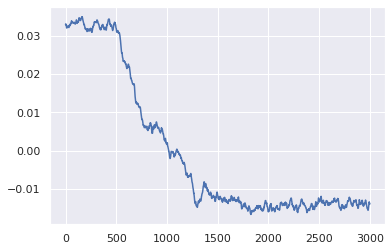

In [29]:
plt.plot(np.arange(len(x)),y)